<a href="https://colab.research.google.com/github/OctavioSantalucia/econometria/blob/main/ejercicios/C2%20Cap%C3%ADtulo%2017%20-%20Modelos%20de%20clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

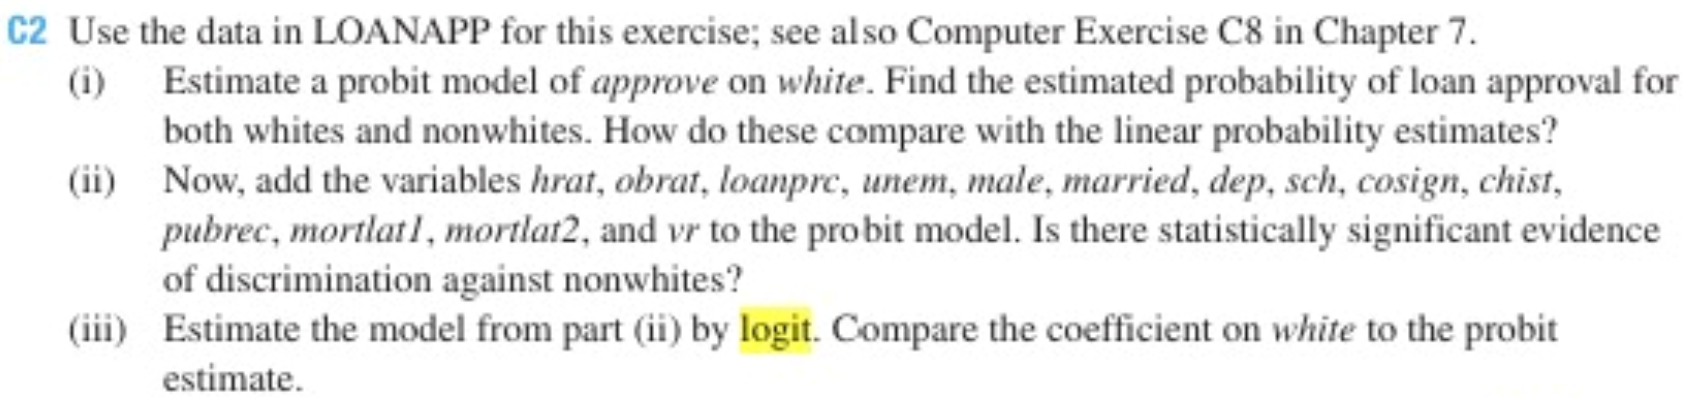

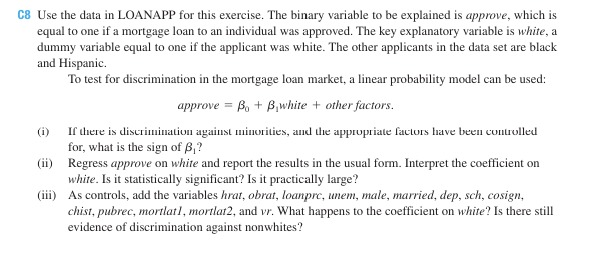

In [2]:
import pandas as pd
import requests
import numpy as np
import statsmodels.api as sm


In [3]:
#importo el dataset
url= 'https://github.com/rpasquini/econometria/blob/main/datos/datasets_wooldridge/loanapp.xls?raw=True'
myfile = requests.get(url)

In [4]:
df=pd.read_excel(myfile.content, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1,89,1,1120,0,72,0,1,0,0,...,1,0,1,0,0,1,0,0.754237,0,1
1,1,128,3,1120,0,74,0,1,1,1,...,0,0,1,0,0,1,0,0.800000,1,1
2,1,128,1,1120,0,84,3,1,0,0,...,1,0,1,0,0,1,0,0.895105,1,1
3,1,66,1,1120,0,36,0,1,1,0,...,1,0,1,0,0,0,0,0.600000,0,1
4,1,120,1,1120,0,59,8,1,1,0,...,1,0,1,0,0,1,0,0.895522,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,158,1,1120,0,96,0,1,1,0,...,1,0,1,0,0,1,0,0.897727,0,1
1985,1,35,1,1120,0,169,1,1,1,0,...,1,1,0,0,0,1,0,0.111111,0,1
1986,2,225,1,1120,0,49,0,2,1,0,...,1,0,1,0,0,1,1,1.000000,0,1
1987,1,98,1,1120,1,110,1,1,0,0,...,1,1,0,0,0,1,0,0.455814,0,1


In [5]:
#añado encabezados
encabezados = ['occ','loanamt','action','msa','suffolk','appinc','typur','unit','married','dep','emp','yjob','self','atotinc','cototinc','hexp','price','other','liq','rep','gdlin','lines','mortg','cons','pubrec','hrat','obrat','fixadj','term','apr','prop','inss','inson','gift','cosign','unver','review','netw','unem','min30','bd','mi','old','vr','sch','black','hispan','male','reject','approve','mortno','mortperf','mortlat1','mortlat2','chist','multi','loanprc','thick','white']
df.columns = encabezados
df

,occ,loanamt,action,msa,suffolk,appinc,typur,unit,married,dep,...,approve,mortno,mortperf,mortlat1,mortlat2,chist,multi,loanprc,thick,white
0,1,89,1,1120,0,72,0,1,0,0,...,1,0,1,0,0,1,0,0.754237,0,1
1,1,128,3,1120,0,74,0,1,1,1,...,0,0,1,0,0,1,0,0.800000,1,1
2,1,128,1,1120,0,84,3,1,0,0,...,1,0,1,0,0,1,0,0.895105,1,1
3,1,66,1,1120,0,36,0,1,1,0,...,1,0,1,0,0,0,0,0.600000,0,1
4,1,120,1,1120,0,59,8,1,1,0,...,1,0,1,0,0,1,0,0.895522,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,158,1,1120,0,96,0,1,1,0,...,1,0,1,0,0,1,0,0.897727,0,1
1985,1,35,1,1120,0,169,1,1,1,0,...,1,1,0,0,0,1,0,0.111111,0,1
1986,2,225,1,1120,0,49,0,2,1,0,...,1,0,1,0,0,1,1,1.000000,0,1
1987,1,98,1,1120,1,110,1,1,0,0,...,1,1,0,0,0,1,0,0.455814,0,1


In [6]:
#defino la función probit, copiada de la slide de clase "5_Modelos_de_Clasificacion"
def probit(lista, data):
  """
  Funcion que realiza la regresion probit
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.Probit(Y,X)
  modeloajustado=modelo.fit()
  print(modeloajustado.summary())
  return modeloajustado

In [7]:
#aplico la función
modeloajustado=probit(['approve','white'], df)

Optimization terminated successfully.
         Current function value: 0.352377
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1989
Model:                         Probit   Df Residuals:                     1987
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                 0.05331
Time:                        19:06:40   Log-Likelihood:                -700.88
converged:                       True   LL-Null:                       -740.35
Covariance Type:            nonrobust   LLR p-value:                 6.408e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5469      0.075      7.251      0.000       0.399       0.695
white          0.7839      0.

In [8]:
#Calculo manulamente
from scipy.stats import norm
#Primero encuentro el valor z*:
zblanco=0.5469+0.7839*1 #constante + b1, multiplicado por 1 porque la variable toma el valor 1 cuando es blanco
fblanco=norm.cdf(zblanco)
print(fblanco)
#y si la persona no es blanca?
znoblanco=0.5469+0.7839*0
fnoblanco=norm.cdf(znoblanco)
print(fnoblanco)

0.9083725860196084
0.707776282135862


In [9]:
#Calculo con código
modeloajustado.predict([1,1]) #esto se lee como, la chance de aprobar si 1=blanco


array([0.90838786])

In [10]:
modeloajustado.predict([1,0]) ##esto se lee como, la chance de aprobar si 0=noblanco

array([0.70779221])

In [11]:
#ii) añadimos las variables
variables=['approve','white','hrat','obrat','loanprc','unem','male','married','dep','sch','cosign','chist','pubrec','mortlat1','mortlat2','vr']
modeloajustado2=probit(variables, df)
#parece haber un error. veámosolo:

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [12]:
df[variables]

,approve,white,hrat,obrat,loanprc,unem,male,married,dep,sch,cosign,chist,pubrec,mortlat1,mortlat2,vr
0,1,1,17.63,34.5,0.754237,3.2,.,0,0,1,0,1,0,0,0,1
1,0,1,22.54,34.1,0.800000,3.2,1,1,1,1,0,1,0,0,0,1
2,1,1,19.00,26.0,0.895105,3.9,1,0,0,1,0,1,0,0,0,0
3,1,1,24.00,37.0,0.600000,3.1,1,1,0,1,0,0,1,0,0,1
4,1,1,25.10,32.1,0.895522,4.3,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,1,20.30,29.3,0.897727,4.3,1,1,0,1,0,1,0,0,0,1
1985,1,1,8.00,20.0,0.111111,3.2,1,1,0,1,0,1,0,0,0,0
1986,1,1,56.10,60.5,1.000000,3.2,1,1,0,0,0,1,0,0,0,0
1987,1,1,16.00,17.0,0.455814,3.2,1,0,0,1,0,1,0,0,0,1


In [13]:
#viendo que hay registros no numéricos, limpio el dataset
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df[variables]

,approve,white,hrat,obrat,loanprc,unem,male,married,dep,sch,cosign,chist,pubrec,mortlat1,mortlat2,vr
1,0,1,22.54,34.1,0.800000,3.2,1.0,1.0,1.0,1,0,1,0,0,0,1
2,1,1,19.00,26.0,0.895105,3.9,1.0,0.0,0.0,1,0,1,0,0,0,0
3,1,1,24.00,37.0,0.600000,3.1,1.0,1.0,0.0,1,0,0,1,0,0,1
4,1,1,25.10,32.1,0.895522,4.3,1.0,1.0,0.0,0,0,1,0,0,0,0
5,1,1,21.00,33.0,0.804348,3.2,1.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1,1,20.30,29.3,0.897727,4.3,1.0,1.0,0.0,1,0,1,0,0,0,1
1985,1,1,8.00,20.0,0.111111,3.2,1.0,1.0,0.0,1,0,1,0,0,0,0
1986,1,1,56.10,60.5,1.000000,3.2,1.0,1.0,0.0,0,0,1,0,0,0,0
1987,1,1,16.00,17.0,0.455814,3.2,1.0,0.0,0.0,1,0,1,0,0,0,1


In [14]:
#ii) ahora sí, añadimos las variables
variables=['approve','white','hrat','obrat','loanprc','unem','male','married','dep','sch','cosign','chist','pubrec','mortlat1','mortlat2','vr']
variables=np.asarray(variables)
print(variables)
modeloajustado2=probit(variables, df)

['approve' 'white' 'hrat' 'obrat' 'loanprc' 'unem' 'male' 'married' 'dep'
 'sch' 'cosign' 'chist' 'pubrec' 'mortlat1' 'mortlat2' 'vr']
Optimization terminated successfully.
         Current function value: 0.308005
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1777
Model:                         Probit   Df Residuals:                     1761
Method:                           MLE   Df Model:                           15
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1893
Time:                        19:06:53   Log-Likelihood:                -547.33
converged:                       True   LL-Null:                       -675.09
Covariance Type:            nonrobust   LLR p-value:                 8.972e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

ii) Podemos entender por el resultado, que incluso controlando por todas estas otras variables, el mero hecho de ser o no ser blanco tiene un efecto en la probabilidad de aprobación, que es estadísticamente significativo dado que tiene un p-value de 0.000.

In [15]:
#iii) definimos la función logit
def logit(lista, data):
  """
  Funcion que realiza la regresion Logit
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  # selecciono el modelo Logit
  modelo=sm.Logit(Y,X)
  modeloajustado=modelo.fit()
  print(modeloajustado.summary())
  return modeloajustado

In [16]:
modeloajustado3=logit(variables, df)

Optimization terminated successfully.
         Current function value: 0.307925
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1777
Model:                          Logit   Df Residuals:                     1761
Method:                           MLE   Df Model:                           15
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                  0.1895
Time:                        19:06:58   Log-Likelihood:                -547.18
converged:                       True   LL-Null:                       -675.09
Covariance Type:            nonrobust   LLR p-value:                 7.834e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7236      0.607      6.133      0.000       2.534       4.914
white          1.0399      0.

La comparación: ambos tienen signos positivos y son estadísticamente significativos. Sin embargo el modelo probit parece ponderar white más que el logit.

==========================================
Comparación con modelo lineal
==========================================

Para ver la utilidad de los modelos de clasificación, compararemos los resultados de hoy contra modelos lineales como los que trabajamos hasta hoy en la materia

In [19]:
def regress(lista, data):
  """
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [20]:
regress(['approve','white'],df)

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.17e-24
Time:                        19:10:54   Log-Likelihood:                -513.38
No. Observations:                1777   AIC:                             1031.
Df Residuals:                    1775   BIC:                             1042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6952      0.019     36.756      0.0

In [21]:
regress(variables,df)

                            OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     23.75
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.64e-60
Time:                        19:10:57   Log-Likelihood:                -401.33
No. Observations:                1777   AIC:                             834.7
Df Residuals:                    1761   BIC:                             922.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9332      0.055     16.940      0.0

Inmediatamente podemos observar que si alguien tiene 1 en white, es decir, es blanco, y todo lo demás está en 0, entonces sus posibilidades de aprobación predecidas superan el 100% lo cual no es lógico obtener.

In [18]:
#calculo el mismo escenario pero en probit
zblanco2= 2.01 + 0.57772*1
fblanco2=norm.cdf(zblanco2)
print(fblanco2)

0.9951693260641015


In [22]:
0.9332+0.1423
#como vemos, el modelo lineal excede el 100% de probabilidades, pero el probit se mantiene entre 0 y 1

1.0755000000000001